## ANÁLISIS LINEAL DE DATOS

El análisis lneal de datos es un enfoque que utiliza técnicas estadísticas lineales para modelar relaciones y patrones lineales entre variables en conjuntos de datos

Al proceso de determminar los parámetros de la recta se le denomina inferencia de los coeficientes de regreción.

$$ y = mx + b $$

#### Métodos de mínimos cuadrados
_Adrien Legendre - Carl Gauss._

Ténica estadística para ajustar una línea o curva 

Para evaluar si la recta es una buena representación de los puntos se definen múltipleas estimadores.
- Coeficiente de correlación (r)
    - Si r es cercano a 0 la recta es una pésima representación de los puntos.
    - Si r es cercano a 1 la recta es una buena representación de los puntos.

In [27]:
import numpy as np # Librería para análisis numérico, funciones matemáticas
import pandas as pd # Librería especializada para leer y manipular datos
import matplotlib.pyplot as plt # Librería especializada para visualizaciones
from sklearn.linear_model import LinearRegression # Librería especializada para análisis de datos y machine Learning

In [28]:
x = np.array([5, 15, 25, 35, 45, 55 ]).reshape(-1, 1) #Formato para dejarlo en columnas
y = np.array([5, 20, 14, 32, 22, 38 ])

In [29]:
model = LinearRegression()
model.fit(x, y)

LinearRegression()

In [30]:
model.predict(x)

array([ 8.33333333, 13.73333333, 19.13333333, 24.53333333, 29.93333333,
       35.33333333])

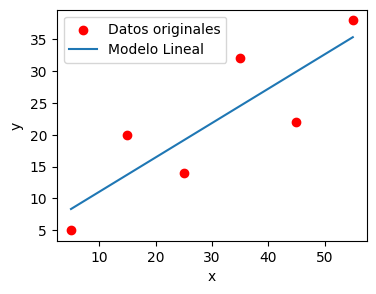

In [31]:
plt.figure(figsize= (4,3))
plt.scatter(x, y, color='red', label='Datos originales')
plt.plot(x, model.predict(x), label= 'Modelo Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [32]:
m = model.coef_[0]
m

0.54

In [33]:
b =  model.intercept_
b

5.633333333333329

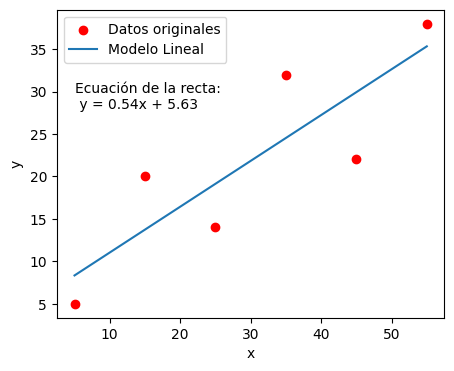

In [34]:
plt.figure(figsize= (5,4))
plt.scatter(x, y, color='red', label='Datos originales')
plt.plot(x, model.predict(x), label= 'Modelo Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.text(5, 28, f'Ecuación de la recta:\n y = {m}x + {b.round(2)}' )
plt.legend()
plt.show()

In [35]:
r2 = model.score(x, y).round(2)
r2

0.72

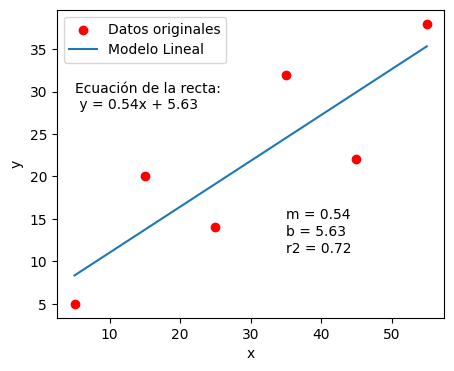

In [36]:
plt.figure(figsize= (5,4))
plt.scatter(x, y, color='red', label='Datos originales')
plt.plot(x, model.predict(x), label= 'Modelo Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.text(5, 28, f'Ecuación de la recta:\n y = {m}x + {b.round(2)}' )
plt.text(35, 15, f'm = {m}' )
plt.text(35, 13, f'b = {b.round(2)}' )
plt.text(35, 11, f'r2 = {r2.round(2)}' )
plt.legend()
plt.show()

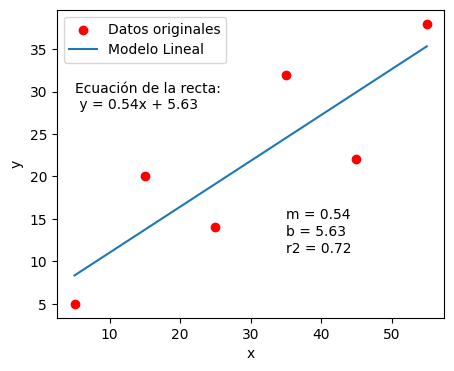

In [37]:
plt.figure(figsize= (5,4))
plt.scatter(x, y, color='red', label='Datos originales')
#plt.plot(x, model.predict(x), label= 'Modelo Lineal')
plt.plot(x, m*x + b, label= 'Modelo Lineal')
plt.xlabel('x')
plt.ylabel('y')
plt.text(5, 28, f'Ecuación de la recta:\n y = {m}x + {b.round(2)}' )
plt.text(35, 15, f'm = {m}' )
plt.text(35, 13, f'b = {b.round(2)}' )
plt.text(35, 11, f'r2 = {r2.round(2)}' )
plt.legend()
plt.show()

#### LEY DE POTENCIAS

$$ y = k*x^a \rightarrow \ln y = a \ln x + \ln k $$

$$ y = k*x^a \rightarrow \ln (y) = \ln (kx^a) $$

$$ \ln (y) = \ln (kx^a) = \ln(k) + \ln (x^a) $$

$$ \ln (x^a) = a\ln(x) $$

$$ \ln (y) = \ln(k) + a\ln(x) $$

$$ \ln (y) = a\ln(x)  + \ln(k) $$

$$ k = e^{\ln(k)} $$



In [38]:
X = np.log(x)
Y = np.log(y)

In [39]:
X

array([[1.60943791],
       [2.7080502 ],
       [3.21887582],
       [3.55534806],
       [3.80666249],
       [4.00733319]])

In [40]:
Y

array([1.60943791, 2.99573227, 2.63905733, 3.4657359 , 3.09104245,
       3.63758616])

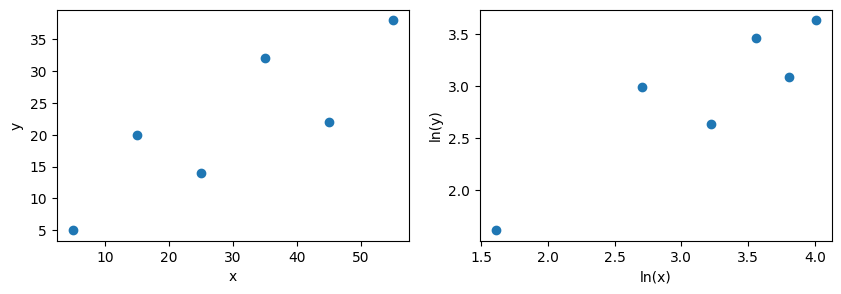

In [41]:
plt.figure(figsize= (10,3))
plt.subplot(1, 2, 1)
plt.scatter(x, y)
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(X, Y)
plt.xlabel('ln(x)')
plt.ylabel('ln(y)')
plt.show()

In [42]:
modelp = LinearRegression() # Modelo de ley de potencias
modelp.fit(X, Y)

LinearRegression()

In [46]:
a = modelp.coef_[0].round(2)
a

0.75

In [44]:
lnk = modelp.intercept_
lnk

0.5536640257699461

In [76]:
k = np.exp(lnk).round(2)
k

1.74

In [45]:
r2p = modelp.score(X, Y).round(2)
r2p

0.82

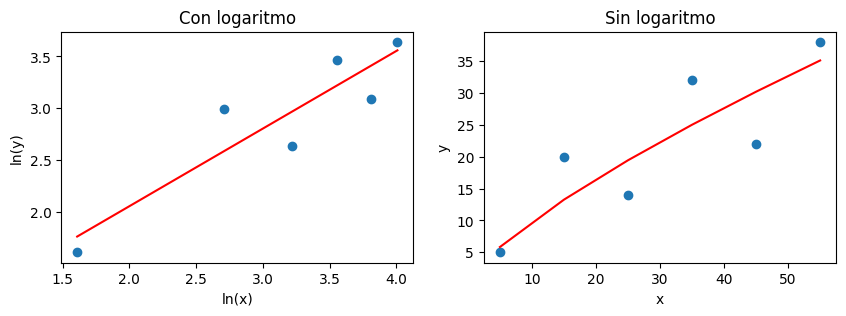

In [74]:
plt.figure(figsize= (10,3))
plt.subplot(1, 2, 1)
plt.title('Con logaritmo')
plt.scatter(X, Y)
plt.plot(X, a*X + lnk, color= 'red')
plt.xlabel('ln(x)')
plt.ylabel('ln(y)')

plt.subplot(1, 2, 2)
plt.title('Sin logaritmo')
plt.scatter(x, y)
plt.plot(x, k*(x**a), color= 'red')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

$$ y = kx^a \rightarrow \ln y = a \ln x + \ln k $$

In [77]:
print(f'k = {k}')
print(f'a = {a}')
print(f'r2 = {r2p}')


k = 1.74
a = 0.75
r2 = 0.82


Ley de potencias obtenida:
$$ y = 1.74 x^{0.75} $$ 

#### MODELO EXPONENCIAL

$$ y = c e^{nx} \rightarrow \ln y = nx + \ln c$$

$$ y = c e^{nx} \rightarrow \ln (y) = \ln (ce^{nx})$$

$$ \ln (y) = \ln (ce^{nx}) = \ln (c) + \ln (e^{nx})$$

$$ \ln (e^{nx}) = nx $$

$$ \ln (y) = \ln (c) + nx $$

$$ \ln (y) = nx + \ln (c) $$

In [79]:
modele = LinearRegression() # Modelo exponencial
modele.fit(x, Y)

LinearRegression()

In [81]:
n = modele.coef_[0].round(2)
n

0.03

In [82]:
lnc = modele.intercept_
lnc

1.9418591181857743

In [83]:
c = np.exp(lnc).round(2)
c

6.97

In [86]:
r2e = modele.score(x, Y).round(2)
r2e

0.68

$$ y = c e^{nx} \rightarrow \ln y = nx + \ln c$$

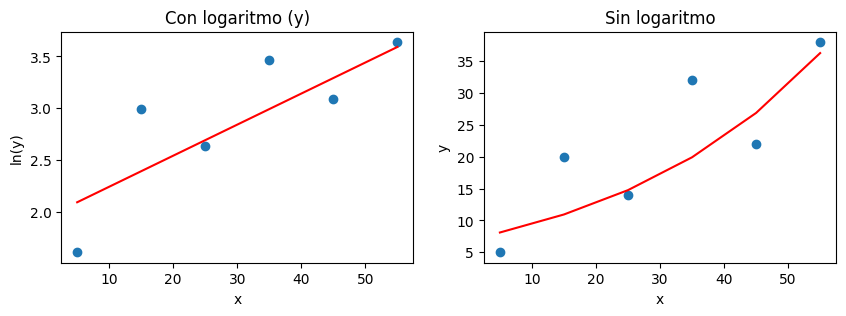

In [96]:
plt.figure(figsize= (10,3))
plt.subplot(1, 2, 1)
plt.title('Con logaritmo (y)')
plt.scatter(x, Y)
plt.plot(x, n*x + lnc, color= 'red')
plt.xlabel('x')
plt.ylabel('ln(y)')

plt.subplot(1, 2, 2)
plt.title('Sin logaritmo')
plt.scatter(x, y)
plt.plot(x, c*np.exp(n*x), color= 'red')
plt.xlabel('x')
plt.ylabel('y')

plt.show()

In [97]:
print(f'n = {n}')
print(f'c = {c}')
print(f'r2 = {r2e}')


n = 0.03
c = 6.97
r2 = 0.68


$$ y = c e^{nx} \rightarrow \ln y = nx + \ln c$$

$$ y = 6.97e^{0.03x} $$

Ejemplo : 
Fémur Dinosaurio. Contexto arqueológico

In [98]:
x = np.array([0.7943, 0.7079, 1.000, 1.1220, 1.6982, 1.2023, 1.9953, 2.2387, 2.5119, 2.5119, 3.1623, 3.5481, 4.4668, 5.8884, 6.7608, 15.136, 15.85])
y = np.array([0.0832, 0.0912, 0.1413, 0.1479, 0.2455, 0.2818, 0.7943, 2.5119, 1.4125, 0.8913, 1.9953, 4.2658, 6.3096, 11.2202, 19.95, 141.25, 158.4893])

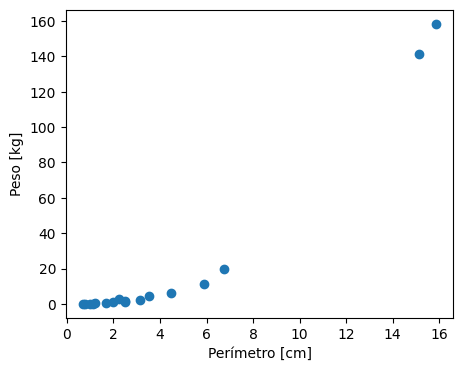

In [102]:
plt.figure(figsize= (5,4))
plt.scatter(x,y)
plt.xlabel('Perímetro [cm]')
plt.ylabel('Peso [kg]')
plt.show()